In [1]:
from src.manipulator import REPAEManipulator
import torch
import matplotlib.pyplot as plt

/home/oliver/miniconda3/envs/repa-e/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Diffusion Example
This notebooks shows how to manipulate the diffusion process in Latent Diffusion Models.

In [7]:
manipulator = REPAEManipulator(
    image_resolution=256,
    model_file="../models/generators/ldm_im.pt"
)
device = manipulator._device  # Select device used in manipulation

Using cache found in /home/oliver/.cache/torch/hub/facebookresearch_dinov2_main


In [8]:
xs, emb = manipulator.get_diff_steps([1,2])  # Get diffusion history and class embedding for two different classes.

In [9]:
n_steps = len(xs)-1  # Get number of steps in diffusion
t_steps = torch.linspace(1, 0, n_steps + 1, device=device)  # Define step range.

In [10]:
"""Here we make the manipulation strategy which takes 1 of the original in all steps except the ones defined below."""
weights_x = [torch.tensor([1,0], device=device)] * n_steps
weights_y = [torch.tensor([1,0], device=device)] * n_steps

for e in [0,1,2,3,4]:  # This steps we do some actual manipulation.
    weights_x[e] = torch.tensor([0.2,0.8], device=device)
    weights_y[e] = torch.tensor([0.2,0.8], device=device)

main = [elem[0] for elem in xs] + [None]  # Keep record of the current latent vector.
y_cur = emb
"""Now we step through the diffusion process and manipulate accordingly."""
for i, (t_cur, t_next) in enumerate(zip(t_steps[:-1], t_steps[1:])):
    xs[i][0] = main[i]
    x_cur = manipulator.manipulate(xs[i], emb, weights_x[i], weights_y[i], t_cur, t_next-t_cur)
    main[i+1] = x_cur

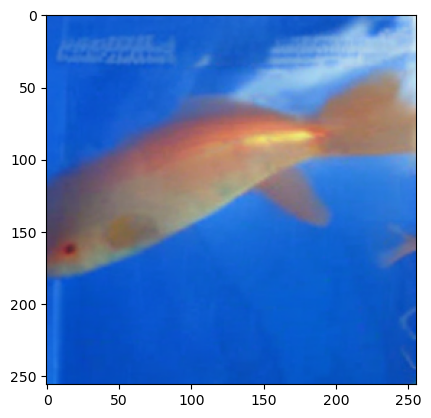

In [11]:
plt.imshow(manipulator.get_image(x_cur)[0].cpu().numpy())  # Show generated image